# Import Libraries

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
mpl.rcParams['figure.dpi'] = 100

# Import data

In [2]:
data = pd.read_csv('CarPrice_Assignment.txt')

In [3]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Plot Data

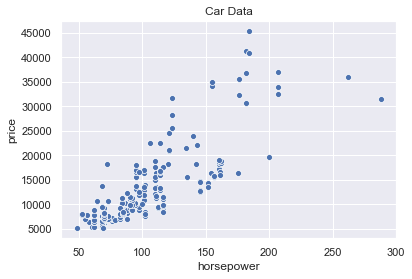

In [4]:
sns.set()
plt.title('Car Data')
sns.scatterplot(x='horsepower', y='price', data=data)

# Define parameters

In [5]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.000004

# Define equations for optimization

In [6]:
# Linear regression model
model = nn.Linear(input_size, output_size)
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Perform optimization

In [7]:

loss_log = []
data_x = data['horsepower']
data_y = data['price']

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(data_x.values[:,None]).float()
    targets = torch.from_numpy(data_y.values[:,None]).float()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss_log.append(loss.item())
    
    # Backward and optimize
    ## Forget gradients from previous step
    optimizer.zero_grad()
    ## Calculate New Gradients
    loss.backward()
    ## Gradient Descent
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [5/100], Loss: 116851072.0000
Epoch [10/100], Loss: 56524280.0000
Epoch [15/100], Loss: 35296904.0000
Epoch [20/100], Loss: 27827548.0000
Epoch [25/100], Loss: 25199274.0000
Epoch [30/100], Loss: 24274440.0000
Epoch [35/100], Loss: 23949008.0000
Epoch [40/100], Loss: 23834484.0000
Epoch [45/100], Loss: 23794176.0000
Epoch [50/100], Loss: 23779980.0000
Epoch [55/100], Loss: 23774974.0000
Epoch [60/100], Loss: 23773202.0000
Epoch [65/100], Loss: 23772568.0000
Epoch [70/100], Loss: 23772330.0000
Epoch [75/100], Loss: 23772236.0000
Epoch [80/100], Loss: 23772194.0000
Epoch [85/100], Loss: 23772166.0000
Epoch [90/100], Loss: 23772146.0000
Epoch [95/100], Loss: 23772126.0000
Epoch [100/100], Loss: 23772108.0000


# Plot Results

[238427616.0, 197960560.0, 165122400.0, 138474944.0, 116851072.0, 99303768.0, 85064504.0, 73509656.0, 64133128.0, 56524280.0, 50349860.0, 45339452.0, 41273604.0, 37974256.0, 35296904.0, 33124290.0, 31361260.0, 29930594.0, 28769636.0, 27827548.0, 27063062.0, 26442698.0, 25939282.0, 25530770.0, 25199274.0, 24930268.0, 24711976.0, 24534834.0, 24391088.0, 24274440.0, 24179784.0, 24102970.0, 24040638.0, 23990056.0, 23949008.0, 23915698.0, 23888666.0, 23866732.0, 23848930.0, 23834484.0, 23822762.0, 23813248.0, 23805526.0, 23799260.0, 23794176.0, 23790048.0, 23786698.0, 23783980.0, 23781772.0, 23779980.0, 23778526.0, 23777344.0, 23776386.0, 23775606.0, 23774974.0, 23774460.0, 23774042.0, 23773704.0, 23773426.0, 23773202.0, 23773018.0, 23772868.0, 23772748.0, 23772648.0, 23772568.0, 23772500.0, 23772444.0, 23772398.0, 23772362.0, 23772330.0, 23772306.0, 23772284.0, 23772268.0, 23772252.0, 23772236.0, 23772226.0, 23772218.0, 23772208.0, 23772200.0, 23772194.0, 23772186.0, 23772180.0, 23772176.0

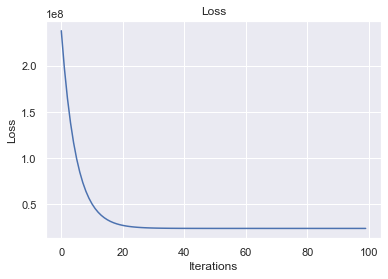

In [8]:
plt.title('Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
print(loss_log)
sns.lineplot(range(len(loss_log)), loss_log)

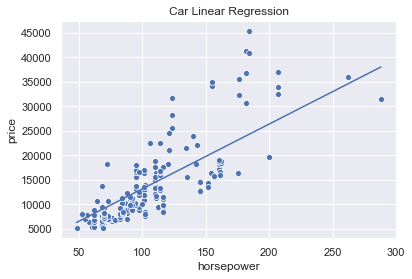

In [9]:
plt.title('Car Linear Regression')
x_line = np.linspace(data['horsepower'].min(), data['horsepower'].max(), 1000)
predictions = model(torch.from_numpy(x_line[:,None]).float())[:,0].tolist()


sns.scatterplot(x='horsepower', y='price', data=data)
sns.lineplot(x=x_line, y=predictions, data=data)